# INTRODUCTION

#### This case study is the Capstone Project of Google Data Analytics Professional Certificate. The 6 steps of Data Analysis is used to present this analysis

## Bellabeat: How Can A Wellness Technology Company Play It Smart?

## STEP 1: ASK

#### 1.0 Background

Bellabeat is a high-tech manufacturer of beautifully-designed health-focused smart products for women since 2013. Inspiring and empowering women with knowledge about their own health and habits, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for females.

The co-founder and Chief Creative Officer, Urška Sršen is confident that an analysis of non-Bellebeat consumer data (ie. FitBit fitness tracker usage data) would reveal more opportunities for growth.

#### 1.2 Business Task:

Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.

#### 1.3 Business Objectives:

1.What are the trends identified?

2.How could these trends apply to Bellabeat customers?

3.How could these trends help influence Bellabeat marketing strategy?

#### 1.4 Deliverables:

A clear summary of the business task.

A description of all data sources used.

Documentation of any cleaning or manipulation of data.

A summary of analysis.

Supporting visualizations and key findings.

High-level content recommendations based on the analysis.

#### 1.5 Key Stakeholders:

Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer.

Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team.

Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.

## STEP 2: PREPARE

#### 2.1 Information on Data Source:

1.The data is publicly available on Kaggle: FitBit Fitness Tracker Data and stored in 18 csv files.

2.Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.

3.30 FitBit users who consented to the submission of personal tracker data.

4.Data collected includes (1) physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.

#### 2.2 Limitations of Data Set:

1.Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.

2.Sample size of 30 female FitBit users is not representative of the entire female population.

3.As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.

#### 2.3 Is Data ROCCC?

A good data source is **ROCCC** which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.

**Reliable** - LOW - Not reliable as it only has 30 respondents

**Original** - LOW - Third party provider (Amazon Mechanical Turk)

**Comprehensive** - MED - Parameters match most of Bellabeat's products' parameters

**Current** - LOW - Data is 5 years old and is not relevant

**Cited** - LOW - Data collected from third party, hence unknown

Overall, the dataset is considered bad quality data and it is not recommended to produce business recommendations based on this data.

#### 2.4 Data Selection:

The following files is selected and copied for analysis.

     . dailyActivity_merged.csv
     
     . hourlyCalories_merged.csv
     
     . hourlyIntensities_merged.csv
     
     . sleepDay_merged.csv
     
     . weightLogInfo_merged.csv

## STEP 3: PROCESS

We are using Python to prepare and process the data.

#### 3.1 Preparing the Environment

The numPy, pandas, matplotlib, datetime packages are installed and aliased for easy reading.

In [25]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import datetime as dt # date time

In [2]:
# read_csv function to read the required CSV files
activity = pd.read_csv("E:/dailyActivity_merged.csv")
calories = pd.read_csv("E:/hourlyCalories_merged.csv")
intensities = pd.read_csv("E:/hourlyIntensities_merged.csv")
sleep = pd.read_csv("E:/sleepDay_merged.csv")
weight = pd.read_csv("E:/weightLogInfo_merged.csv")

In [3]:
# preview first 5 rows with all columns

activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
# preview first 5 rows with all columns

calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [5]:
# preview first 5 rows with all columns

intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [6]:
# preview first 5 rows with all columns

sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [7]:
# preview first 5 rows with all columns

weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


I spotted some problems with the timestamp data. So before analysis, I need to convert it to date time format and split to date and time.

## Fixing formatting

In [8]:
# Convert ActivityHour to datetime object
intensities["ActivityHour"] = pd.to_datetime(intensities["ActivityHour"], format="%m/%d/%Y %I:%M:%S %p")

# Extract time and date components
intensities["time"] = intensities["ActivityHour"].dt.strftime("%H:%M:%S")
intensities["date"] = intensities["ActivityHour"].dt.strftime("%m/%d/%y")

In [9]:
# Convert ActivityHour to datetime object in calories dataframe
calories["ActivityHour"] = pd.to_datetime(calories["ActivityHour"], format="%m/%d/%Y %I:%M:%S %p")
calories["time"] = calories["ActivityHour"].dt.strftime("%H:%M:%S")
calories["date"] = calories["ActivityHour"].dt.strftime("%m/%d/%y")

In [10]:
# Convert ActivityDate to datetime object in activity dataframe
activity["ActivityDate"] = pd.to_datetime(activity["ActivityDate"], format="%m/%d/%Y")
activity["date"] = activity["ActivityDate"].dt.strftime("%m/%d/%y")

In [11]:
# Convert SleepDay to datetime object in sleep dataframe
sleep["SleepDay"] = pd.to_datetime(sleep["SleepDay"], format="%m/%d/%Y %I:%M:%S %p")
sleep["date"] = sleep["SleepDay"].dt.strftime("%m/%d/%y")

## Exploring and summarizing data

In [13]:
activity["Id"].nunique()

33

In [14]:
calories["Id"].nunique()

33

In [15]:
intensities["Id"].nunique()

33

In [16]:
sleep["Id"].nunique()

24

In [17]:
weight["Id"].nunique()

8

This information tells us about number participants in each data sets.

There is 33 participants in the activity, calories and intensities data sets, 24 in the sleep and only 8 in the weight data set. 8 participants is not significant to make any recommendations and conclusions based on this data.

Let’s have a look at summary statistics of the data sets:

## STEP 4: ANALYZE

#### 4.1 Perform calculations

Pulling the statistics 

In [18]:
activity[["TotalSteps", "TotalDistance", "SedentaryMinutes", "Calories" ]].describe()

,TotalSteps,TotalDistance,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,991.210638,2303.609574
std,5087.150742,3.924606,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,729.750000,1828.500000
50%,7405.500000,5.245000,1057.500000,2134.000000
75%,10727.000000,7.712500,1229.500000,2793.250000
max,36019.000000,28.030001,1440.000000,4900.000000


In [19]:
activity[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes" ]].describe()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes
count,940.000000,940.000000,940.000000
mean,21.164894,13.564894,192.812766
std,32.844803,19.987404,109.174700
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,127.000000
50%,4.000000,6.000000,199.000000
75%,32.000000,19.000000,264.000000
max,210.000000,143.000000,518.000000


In [21]:
calories[["Calories"]].describe()

,Calories
count,22099.000000
mean,97.386760
std,60.702622
min,42.000000
25%,63.000000
50%,83.000000
75%,108.000000
max,948.000000


In [22]:
sleep[["TotalSleepRecords", "TotalMinutesAsleep","TotalTimeInBed"]].describe()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,413.000000,413.000000
mean,1.118644,419.467312,458.639225
std,0.345521,118.344679,127.101607
min,1.000000,58.000000,61.000000
25%,1.000000,361.000000,403.000000
50%,1.000000,433.000000,463.000000
75%,1.000000,490.000000,526.000000
max,3.000000,796.000000,961.000000


In [23]:
weight[["WeightKg", "BMI"]].describe()

,WeightKg,BMI
count,67.000000,67.000000
mean,72.035821,25.185224
std,13.923206,3.066963
min,52.599998,21.450001
25%,61.400002,23.959999
50%,62.500000,24.389999
75%,85.049999,25.559999
max,133.500000,47.540001


#### Some interesting discoveries from this summary:

Average sedentary time is 991 minutes or 16 hours. Definately needs to be reduced!

The majority of the participants are lightly active.

On the average, participants sleep 1 time for 7 hours.

Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps.

In [24]:
merged_data = pd.merge(sleep, activity, on=["Id", "date"])
merged_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,1,327,346,04/12/16,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,2,384,407,04/13/16,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-15,1,412,442,04/15/16,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
3,1503960366,2016-04-16,2,340,367,04/16/16,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
4,1503960366,2016-04-17,1,700,712,04/17/16,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728


## STEP 5: SHARE

In this step, we are creating visualizations and communicating our findings based on our analysis.

#### 5.1 Data Visualisation and Findings

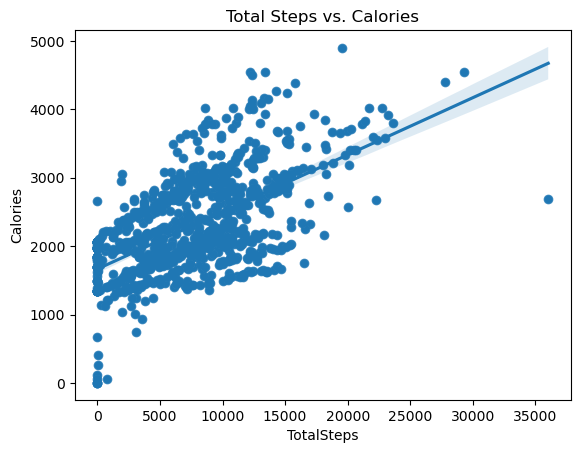

In [28]:
sns.scatterplot(data=activity, x="TotalSteps", y="Calories")
sns.regplot(data=activity, x="TotalSteps", y="Calories")
plt.title("Total Steps vs. Calories")
plt.show()

I see positive correlation here between Total Steps and Calories, which is obvious - the more active we are, the more calories we burn.

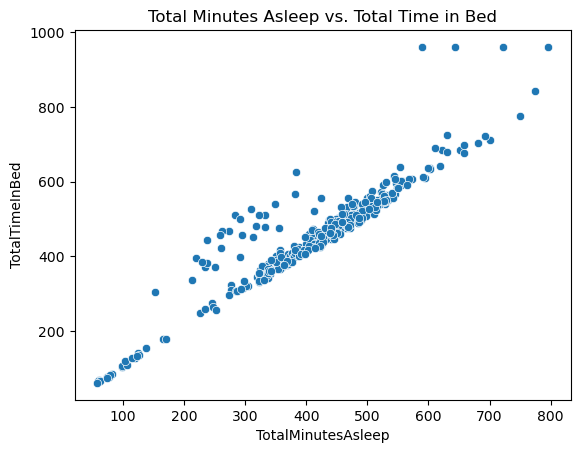

In [29]:
sns.scatterplot(data=sleep, x="TotalMinutesAsleep", y="TotalTimeInBed")
plt.title("Total Minutes Asleep vs. Total Time in Bed")
plt.show()

The relationship between Total Minutes Asleep and Total Time in Bed looks linear. So if the Bellabeat users want to improve their sleep, we should consider using notification to go to sleep.

Let's look at intensities data over time (hourly).

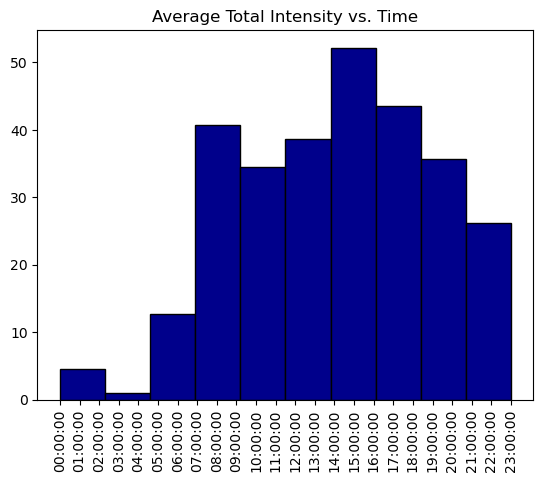

In [37]:
int_new = intensities.groupby('time')['TotalIntensity'].mean().reset_index()

plt.hist(x=int_new['time'], weights=int_new['TotalIntensity'], color='darkblue', edgecolor = "black")
plt.xticks(rotation=90)
plt.title('Average Total Intensity vs. Time')
plt.show()

After visualizing Total Intensity hourly, I found out that people are more active between 5 am and 10pm.

Most activity happens between 5 pm and 7 pm - I suppose, that people go to a gym or for a walk after finishing work. We can use this time in the Bellabeat app to remind and motivate users to go for a run or walk.

Let's look at the relationship between Total Minutes Asleep and Sedentry Minutes.

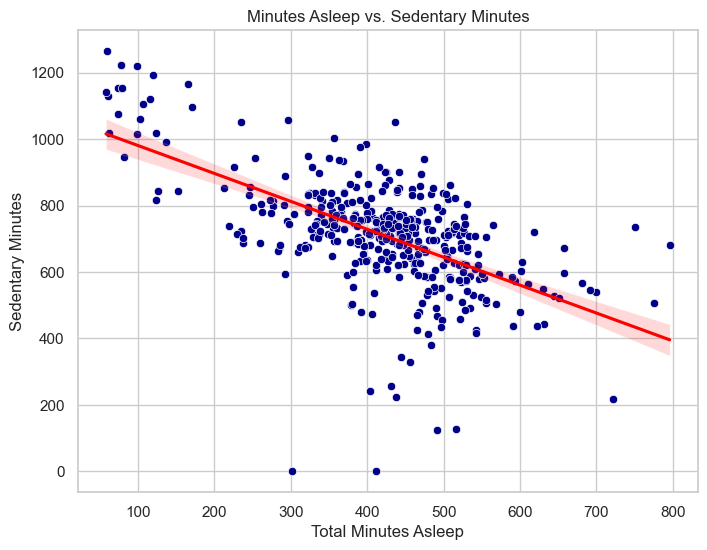

In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_data, x='TotalMinutesAsleep', y='SedentaryMinutes', color='darkblue')
sns.regplot(data=merged_data, x='TotalMinutesAsleep', y='SedentaryMinutes', color='red', scatter=False)
plt.title('Minutes Asleep vs. Sedentary Minutes')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Sedentary Minutes')
plt.show()

Here we can clearly see the negative relationship between Sedentary Minutes and Sleep time.

As an idea: if Bellabeat users want to improve their sleep, Bellabeat app can recommend reducing sedentary time.

Keep in mind that we need to support this insights with more data, because correlation between some data doesn’t mean causation.

## STEP 6: ACT

In the final step, we will be delivering our insights and providing recommendations based on our analysis.

#### Summarizing recommendations for the business

As we already know, collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

After analyzing FitBit Fitness Tracker Data, I found some insights that would help influence Bellabeat marketing strategy.

#### Target audience

Women who work full-time jobs (according to the hourly intensity data) and spend a lot of time at the computer/in a meeting/ focused on work they are doing (according to the sedentary time data).

These women do some light activity to stay healthy (according to the activity type analysis). Even though they need to improve their everyday activity to have health benefits. They might need some knowledge about developing healthy habits or motivation to keep going.

As there is no gender information about the participants, I assumed that all genders were presented and balanced in this data set.

#### The key message for the Bellabeat online campaign

The Bellabeat app is not just another fitness activity app. It’s a guide (a friend) who empowers women to balance full personal and professional life and healthy habits and routines by educating and motivating them through daily app recommendations.

## Ideas for the Bellabeat app

1.Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps. Bellabeat can encourage people to take at least 8 000 explaining the benefits for their health.

2.If users want to lose weight, it’s probably a good idea to control daily calorie consumption. Bellabeat can suggest some ideas for low-calorie lunch and dinner.

3.If users want to improve their sleep, Bellabeat should consider using app notifications to go to bed.

4.Most activity happens between 5 pm and 7 pm - I suppose, that people go to a gym or for a walk after finishing work. Bellabeat can use this time to remind and motivate users to go for a run or walk.

5.As an idea: if users want to improve their sleep, the Bellabeat app can recommend reducing sedentary time.